In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [48]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

In [49]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [50]:
# shuffle the input data
import random
random.shuffle(image_data)

In [51]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

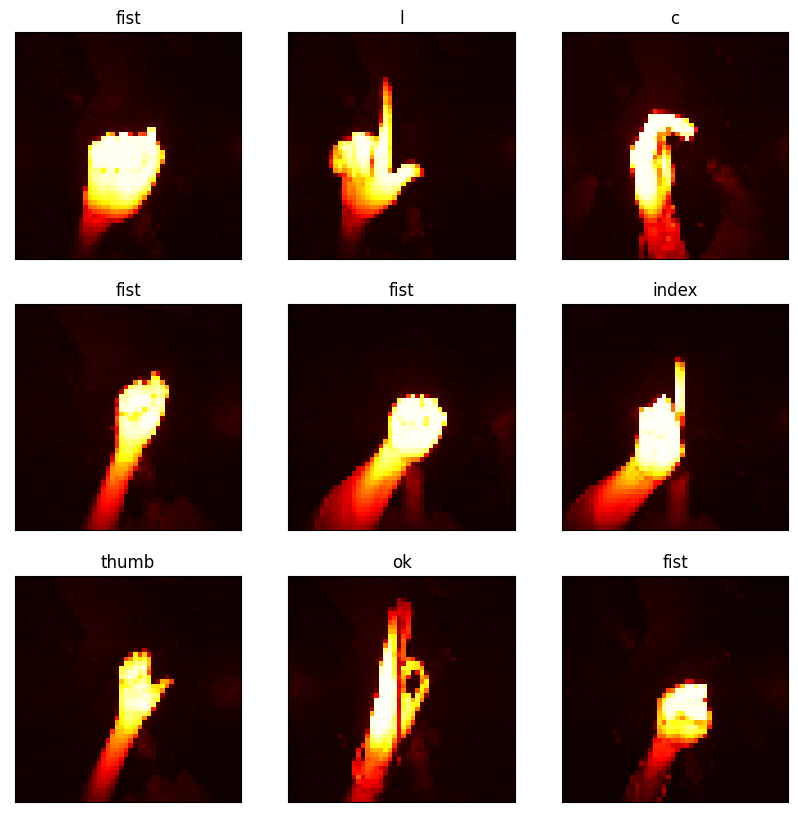

In [52]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [53]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [54]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [55]:
#reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [56]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [57]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [58]:
history=model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 70s 159ms/step - loss: 0.3476 - accuracy: 0.8885 - val_loss: 0.0436 - val_accuracy: 0.9847
Epoch 2/7
438/438 [==============================] - 69s 157ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0033 - val_accuracy: 0.9988
Epoch 3/7
438/438 [==============================] - 69s 157ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 4/7
438/438 [==============================] - 69s 157ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.1625 - val_accuracy: 0.9622
Epoch 5/7
438/438 [==============================] - 70s 159ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 6/7
438/438 [==============================] - 70s 159ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 7/7
438/438 [==============================] - 69s 157ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0010 - val_accuracy:

In [59]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 6s 30ms/step - loss: 0.0010 - accuracy: 0.9997
Test accuracy: 99.97%


In [21]:
pip install tensorflow-model-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow_model_optimization.sparsity import keras as sparsity

In [61]:
pruning_schedule = sparsity.PolynomialDecay(
    initial_sparsity=0.0,
    final_sparsity=0.8,
    begin_step=5,
    end_step=10
)


In [62]:
pruned_model = sparsity.prune_low_magnitude(model, pruning_schedule=pruning_schedule)


In [63]:
pruned_model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [64]:
import os
from datetime import datetime

log_dir = os.path.join("logs", "fit", datetime.now().strftime("20220505-123456"))


In [65]:
callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=log_dir, profile_batch=0)
]

pruned_history=pruned_model.fit(
    X_train,
    y_train,
    epochs=7,
    batch_size=32,
    callbacks=callbacks,
    validation_data=(X_test, y_test)
)


Epoch 1/7
438/438 [==============================] - 79s 173ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 2/7
438/438 [==============================] - 71s 161ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 3/7
438/438 [==============================] - 71s 161ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 8.3439e-04 - val_accuracy: 0.9998
Epoch 4/7
438/438 [==============================] - 71s 162ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 5/7
438/438 [==============================] - 71s 161ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 6/7
438/438 [==============================] - 71s 162ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0070 - val_accuracy: 0.9983
Epoch 7/7
438/438 [==============================] - 75s 171ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0015 - val_accur

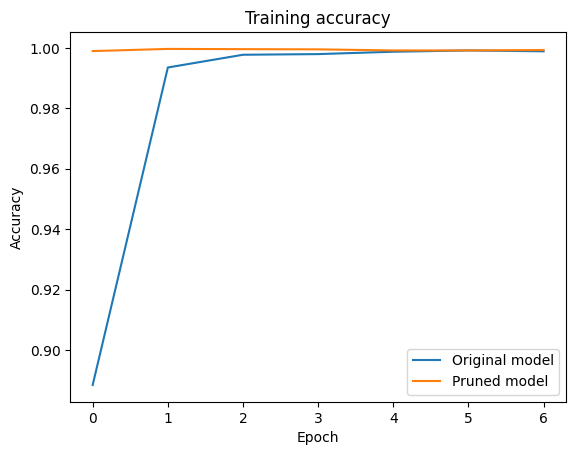

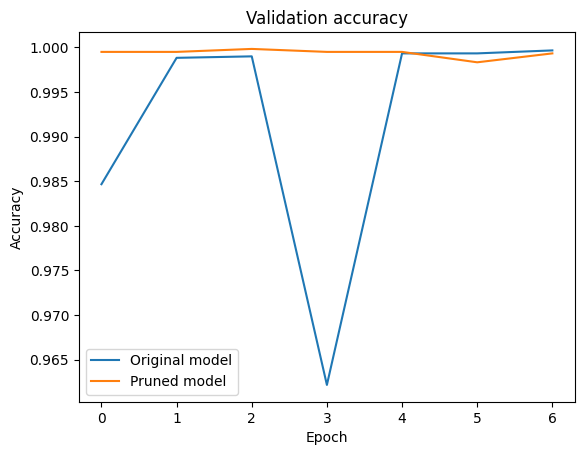

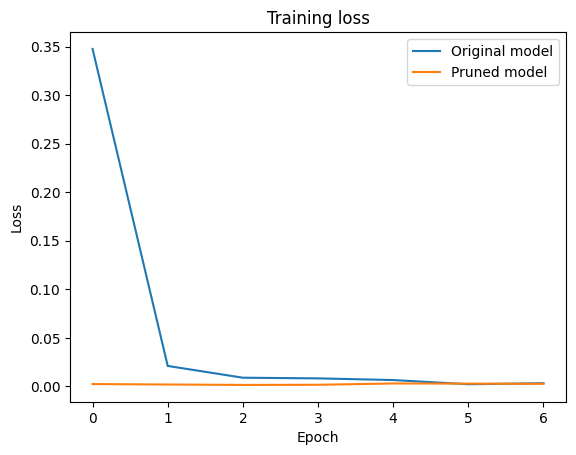

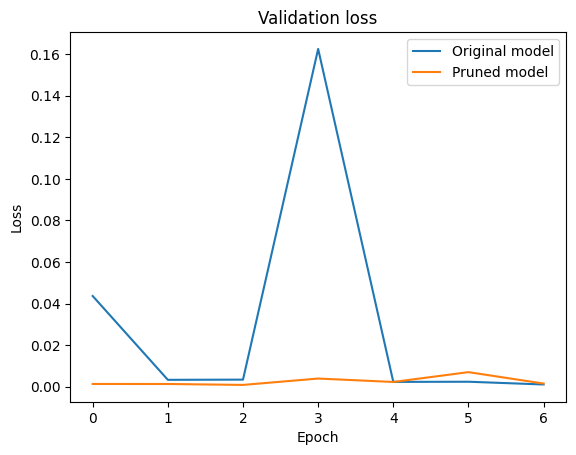

In [66]:
import matplotlib.pyplot as plt

# Plot the accuracy for the original model and the pruned model
plt.plot(history.history['accuracy'], label='Original model')
plt.plot(pruned_history.history['accuracy'], label='Pruned model')
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the validation accuracy for the original model and the pruned model
plt.plot(history.history['val_accuracy'], label='Original model')
plt.plot(pruned_history.history['val_accuracy'], label='Pruned model')
plt.title('Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss for the original model and the pruned model
plt.plot(history.history['loss'], label='Original model')
plt.plot(pruned_history.history['loss'], label='Pruned model')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the validation loss for the original model and the pruned model
plt.plot(history.history['val_loss'], label='Original model')
plt.plot(pruned_history.history['val_loss'], label='Pruned model')
plt.title('Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 32)        0         
                                                      